In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ast
import math
import numpy as np
from collections import defaultdict
import re

In [35]:
data = pd.read_csv('./results_and_time.csv')
data.head(1)

,id,Image URL,text,top_probs,top_labels,Year,Emperor,Shogun,Samurai,Minister,...,Merchant,Craftsman,Kabuki,Mountain,Sea,Lake,Plant,Animal,Man,Woman
0,AN00418884_001_l.jpg,https://data.ukiyo-e.org/bm/scaled/AN00418884_...,sixth miss embassy procession man hat beard ho...,"[0.0250396728515625, 0.0242767333984375, 0.024...","['Plant', 'Samurai', 'Soldier', 'Army', 'Worke...",1711,0.0,0.0,0.024277,0.0,...,0.0,0.019806,0.0,0.0,0.0,0.0,0.02504,0.0,0.0,0.020767


In [33]:
keywords = ['Emperor', 'Shogun', 'Samurai', 'Minister', 'Constitution',
              'Courtroom', 'Contract', 'Patent', 'Judge', 'Lawyer', 'Police', 'Prison',
              'School', 'Uniform', 'Textbook', 'Scientific instrument',
              'Steamship', 'Telegraph', 'Brick', 'Bank', 'Factory', 'Steam', 'Worker', 'Railway', 'Train', 'Lantern', 'Bulb', 'Bus', 'Clock', 'Bicycle', 'Motorcycle', 'Car', 'Bridge',
              'Soldier', 'Gun', 'Warship', 'Sword', 'Army',
              'Kimono', 'Suit', 'Gown', 'Glove',
              'Farmer','Merchant', 'Craftsman', 'Kabuki',
              'Mountain', 'Sea', 'Lake', 'Plant', 'Animal', 'Man', 'Woman']

In [51]:
# compare the probas with 0.1, and mask accordingly
def mask_column(df, k, ths):
    df[k] = df[k].apply(lambda x: 1 if x > ths else 0)

threshold = 0.02

sums = {}

data_mask = data.copy(deep=True)

for k in keywords:
    mask_column(data_mask, k, threshold)
    #data[k].apply(lambda x: 1 if x > threshold else 0)
    sums[k] = data_mask[k].sum()

print(sums) # this means maybe 0.1 is not a super good threshold...
data_mask.head(1)

{'Emperor': 128875, 'Shogun': 130962, 'Samurai': 46038, 'Minister': 5452, 'Constitution': 76115, 'Courtroom': 15, 'Contract': 45, 'Patent': 1, 'Judge': 2756, 'Lawyer': 1, 'Police': 5601, 'Prison': 2, 'School': 6922, 'Uniform': 23, 'Textbook': 42, 'Scientific instrument': 110594, 'Steamship': 59323, 'Telegraph': 7129, 'Brick': 4526, 'Bank': 40109, 'Factory': 106, 'Steam': 23257, 'Worker': 23867, 'Railway': 19428, 'Train': 55818, 'Lantern': 41964, 'Bulb': 866, 'Bus': 20606, 'Clock': 13332, 'Bicycle': 62, 'Motorcycle': 53, 'Car': 3115, 'Bridge': 71013, 'Soldier': 17331, 'Gun': 23494, 'Warship': 11535, 'Sword': 114925, 'Army': 9768, 'Kimono': 66280, 'Suit': 2562, 'Gown': 73, 'Glove': 1603, 'Farmer': 11467, 'Merchant': 109696, 'Craftsman': 1413, 'Kabuki': 145522, 'Mountain': 54347, 'Sea': 29704, 'Lake': 57385, 'Plant': 12730, 'Animal': 15332, 'Man': 9020, 'Woman': 34061}


,id,Image URL,text,top_probs,top_labels,Year,Emperor,Shogun,Samurai,Minister,...,Merchant,Craftsman,Kabuki,Mountain,Sea,Lake,Plant,Animal,Man,Woman
0,AN00418884_001_l.jpg,https://data.ukiyo-e.org/bm/scaled/AN00418884_...,sixth miss embassy procession man hat beard ho...,"[0.0250396728515625, 0.0242767333984375, 0.024...","['Plant', 'Samurai', 'Soldier', 'Army', 'Worke...",1711,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


{'Emperor': 0, 'Shogun': 23991, 'Samurai': 0, 'Minister': 0, 'Constitution': 0, 'Courtroom': 0, 'Contract': 0, 'Patent': 0, 'Judge': 0, 'Lawyer': 0, 'Police': 0, 'Prison': 0, 'School': 0, 'Uniform': 0, 'Textbook': 0, 'Scientific instrument': 0, 'Steamship': 0, 'Telegraph': 0, 'Brick': 0, 'Bank': 0, 'Factory': 0, 'Steam': 0, 'Worker': 0, 'Railway': 0, 'Train': 0, 'Lantern': 0, 'Bulb': 0, 'Bus': 0, 'Clock': 0, 'Bicycle': 0, 'Motorcycle': 0, 'Car': 0, 'Bridge': 0, 'Soldier': 0, 'Gun': 0, 'Warship': 0, 'Sword': 58, 'Army': 0, 'Kimono': 0, 'Suit': 0, 'Gown': 0, 'Glove': 0, 'Farmer': 0, 'Merchant': 0, 'Craftsman': 0, 'Kabuki': 35864, 'Mountain': 0, 'Sea': 0, 'Lake': 15601, 'Plant': 0, 'Animal': 0, 'Man': 0, 'Woman': 0}


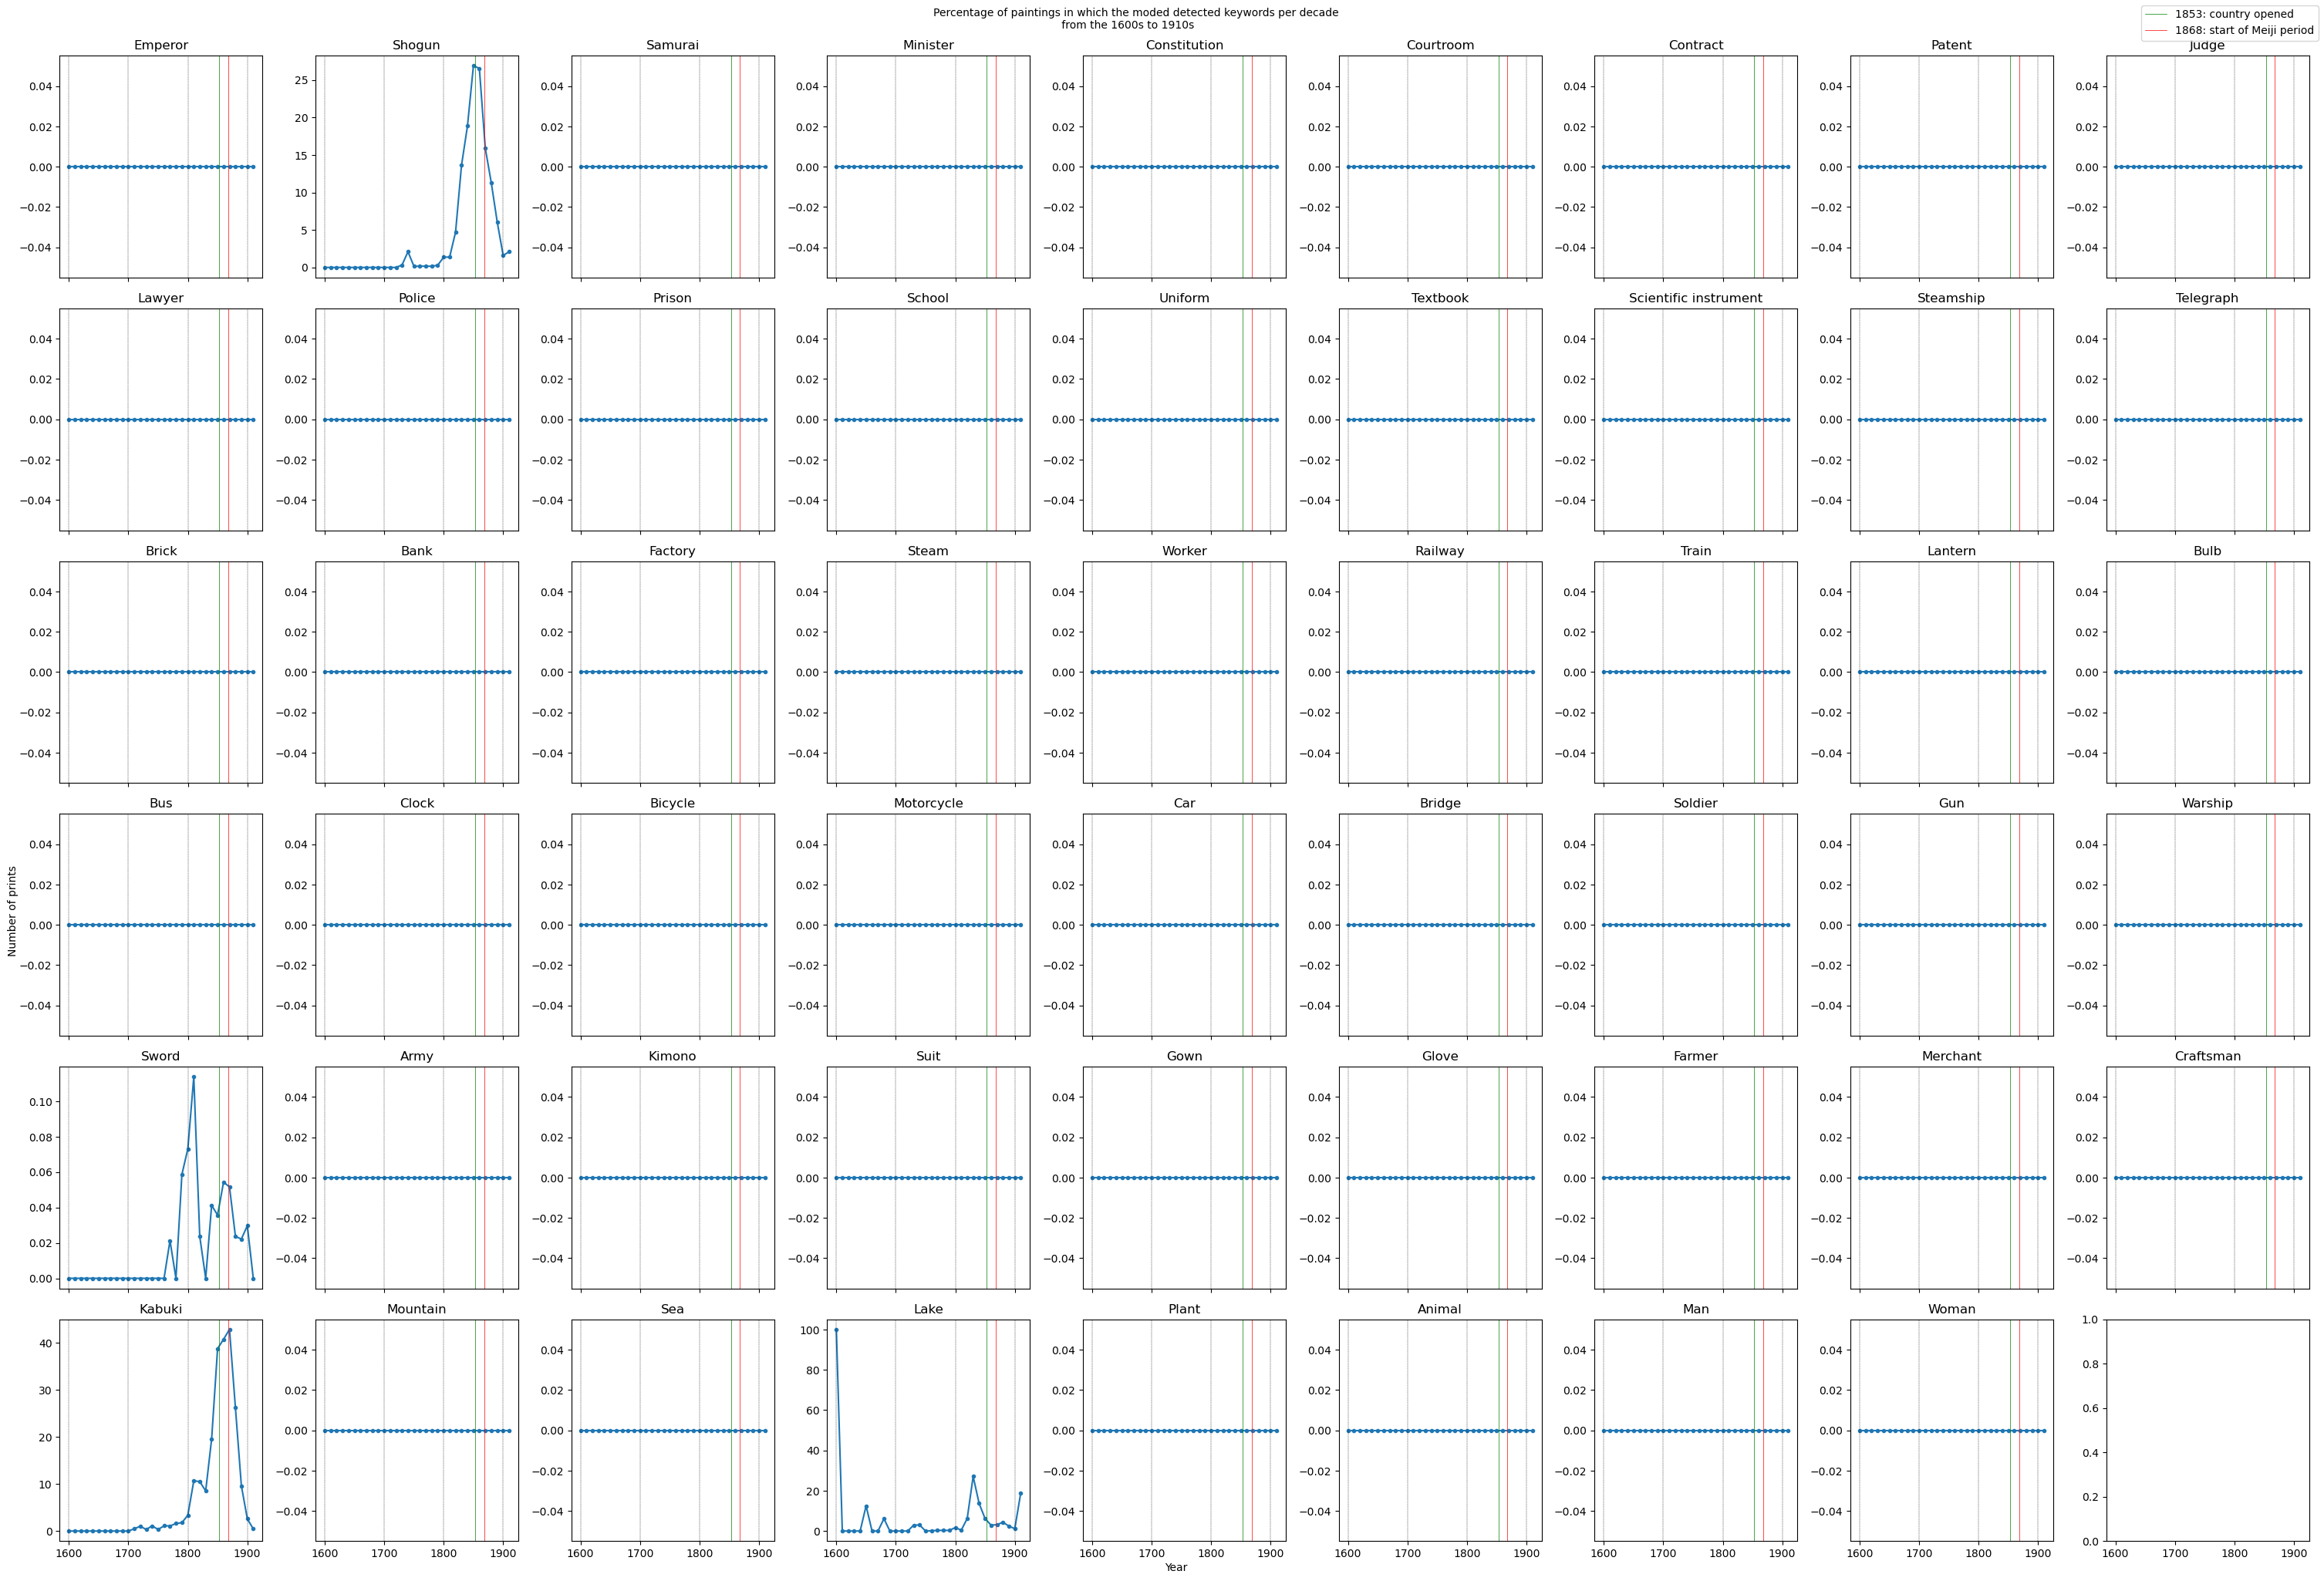

In [58]:
# compare the probas with 0.1, and mask accordingly
def mask_column(df, k, ths):
    df[k] = df[k].apply(lambda x: 1 if x > ths else 0)

threshold = 0.1

sums = {}

data_mask = data.copy(deep=True)

for k in keywords:
    mask_column(data_mask, k, threshold)
    #data[k].apply(lambda x: 1 if x > threshold else 0)
    sums[k] = data_mask[k].sum()

print(sums) # this means maybe 0.1 is not a super good threshold...

# making the graphs
decades = [x*10 for x in range(160, 193)]
counts, bins_global = np.histogram(data.Year, bins=decades)

fig, ax = plt.subplots(6,9,figsize= (30,20), sharey = False, sharex = True)

def add_lines(subplot, i):
    subplot.axvline(x=1600, color='black', linewidth=0.3, linestyle="--")
    subplot.axvline(x=1700, color='black', linewidth=0.3, linestyle="--")
    subplot.axvline(x=1800, color='black', linewidth=0.3, linestyle="--")
    subplot.axvline(x=1900, color='black', linewidth=0.3, linestyle="--")
    if (i==0):
        subplot.axvline(x=1853, color='green', linewidth=0.5, label='1853: country opened')
        subplot.axvline(x=1868, color='red', linewidth=0.5, label='1868: start of Meiji period')
    else:
        subplot.axvline(x=1853, color='green', linewidth=0.5)
        subplot.axvline(x=1868, color='red', linewidth=0.5)

for i in range(len(keywords)):
    sbplt = ax[math.floor(i/9), i%9]

    # get all paintings where a certain keyword occurs
    k_test = keywords[i]
    df = data_mask[['Year', k_test]] # there we have all paintings
    df = df[df[k_test]>0] # there we have all paintings (across all decades) in which the word appears

     # get raw nb of paintings where word occurs per decade
    counts_k, bins_k = np.histogram(df.Year, bins=bins_global)

    # normalize nb of paintings where word occurs per decade over nb of paintings in the decade (get percentage)
    counts_k_norm = [100*counts_k[i]/max(counts[i], 1) for i in range(len(counts_k))] 

    # make line plot
    sbplt.plot(bins_k[0:len(bins_k)-1], counts_k_norm, marker='o', markersize=3)
    add_lines(sbplt, i)
    sbplt.set_title(k_test)
    
fig.tight_layout()

fig.text(0.5,0, "Year")
fig.text(0,0.4, "Number of prints", rotation = 90)
fig.text(0.4, 1, "Percentage of paintings in which the moded detected keywords per decade\n                                      from the 1600s to 1910s") # the \n is to fit the legend correctly, spaces to center what's after the \n
fig.legend()